In [104]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
df_unscaled = df.copy()
df_unscaled

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [107]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [109]:
y_train.value_counts(1)

Labour          0.696513
Conservative    0.303487
Name: vote, dtype: float64

In [110]:
y_test.value_counts(1)

Labour          0.697368
Conservative    0.302632
Name: vote, dtype: float64

In [111]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,71,3,3,4,2,11,0,0
706,57,4,5,4,1,3,2,0
1140,24,3,4,2,4,11,0,1
1077,43,4,4,2,3,5,0,1
954,37,3,2,4,2,7,2,1
...,...,...,...,...,...,...,...,...
512,80,2,2,2,4,7,2,1
825,27,3,3,2,4,5,2,0
348,56,4,2,5,2,1,2,0
1241,75,4,3,4,5,7,3,0


In [112]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,1.078284,-0.274403,-0.137087,0.557983,-0.625062,1.316728,-1.417763,-0.917613
706,0.181786,0.858443,1.986262,0.557983,-1.441798,-1.148833,0.422294,-0.917613
1140,-1.931388,-0.274403,0.924587,-1.180695,1.008412,1.316728,-1.417763,1.089784
1077,-0.714712,0.858443,0.924587,-1.180695,0.191675,-0.532443,-1.417763,1.089784
954,-1.098925,-0.274403,-1.198761,0.557983,-0.625062,0.083948,0.422294,1.089784
...,...,...,...,...,...,...,...,...
512,1.654605,-1.407249,-1.198761,-1.180695,1.008412,0.083948,0.422294,1.089784
825,-1.739281,-0.274403,-0.137087,-1.180695,1.008412,-0.532443,0.422294,-0.917613
348,0.117751,0.858443,-1.198761,1.427322,-0.625062,-1.765223,0.422294,-0.917613
1241,1.334427,0.858443,-0.137087,0.557983,1.825149,0.083948,1.342323,-0.917613


In [113]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,1.078284,-1.407249,-0.137087,0.557983,-0.625062,1.316728,-1.417763,-0.917613
765,-1.483139,-1.407249,-1.198761,-1.180695,1.008412,-0.532443,0.422294,1.089784
415,-1.226997,0.858443,-0.137087,-1.180695,-1.441798,0.083948,0.422294,1.089784
1029,-1.291032,0.858443,0.924587,0.557983,-0.625062,0.083948,-1.417763,-0.917613
506,-0.906819,-0.274403,0.924587,0.557983,-0.625062,0.083948,1.342323,1.089784
...,...,...,...,...,...,...,...,...
653,0.181786,0.858443,0.924587,0.557983,-0.625062,1.316728,-1.417763,-0.917613
504,0.950213,-0.274403,0.924587,-1.180695,1.008412,0.700338,0.422294,1.089784
1423,1.526533,-0.274403,-0.137087,1.427322,-0.625062,-1.148833,-1.417763,-0.917613
886,-1.226997,-0.274403,0.924587,-1.180695,1.008412,1.316728,-1.417763,1.089784


In [114]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,1.078284,3,3,4,2,11,0,0
706,0.181786,4,5,4,1,3,2,0
1140,-1.931388,3,4,2,4,11,0,1
1077,-0.714712,4,4,2,3,5,0,1
954,-1.098925,3,2,4,2,7,2,1
...,...,...,...,...,...,...,...,...
512,1.654605,2,2,2,4,7,2,1
825,-1.739281,3,3,2,4,5,2,0
348,0.117751,4,2,5,2,1,2,0
1241,1.334427,4,3,4,5,7,3,0


In [115]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,1.078284,2,3,4,2,11,0,0
765,-1.483139,2,2,2,4,5,2,1
415,-1.226997,4,3,2,1,7,2,1
1029,-1.291032,4,4,4,2,7,0,0
506,-0.906819,3,4,4,2,7,3,1
...,...,...,...,...,...,...,...,...
653,0.181786,4,4,4,2,11,0,0
504,0.950213,3,4,2,4,9,2,1
1423,1.526533,3,3,5,2,3,0,0
886,-1.226997,3,4,2,4,11,0,1


In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [117]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [118]:
model.score(X_train, y_train)

0.8284637134778511

In [119]:
model.score(X_test, y_test)

0.8552631578947368

In [120]:
model.coef_

array([[-0.01328781,  0.34685048,  0.03464569,  0.54905453, -0.85539958,
        -0.20791842, -0.40322178,  0.04963362]])

In [121]:
model.intercept_,

(array([3.32692859]),)

In [122]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("Coefficient for '{}' is {}.".format(col_name, round(model.coef_[0][idx],4)))

Coefficient for 'age' is -0.0133.
Coefficient for 'economic.cond.national' is 0.3469.
Coefficient for 'economic.cond.household' is 0.0346.
Coefficient for 'Blair' is 0.5491.
Coefficient for 'Hague' is -0.8554.
Coefficient for 'Europe' is -0.2079.
Coefficient for 'political.knowledge' is -0.4032.
Coefficient for 'gender_male' is 0.0496.


In [123]:
model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [124]:
model.score(X_train_scaled, y_train)

0.827521206409048

In [125]:
model.score(X_test_scaled, y_test)

0.8552631578947368

In [126]:
model.fit(X_train_age_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [127]:
model.score(X_train_age_scaled, y_train)

0.8284637134778511

In [128]:
model.score(X_test_age_scaled, y_test)

0.8552631578947368

In [129]:
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [130]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [131]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [132]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag')


In [133]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 886 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [134]:
model.score(X_train, y_train)

0.825636192271442

In [135]:
model.score(X_test, y_test)

0.8574561403508771

In [136]:
model.intercept_

array([2.19183012])

In [137]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for age is -0.008807649334801531
The coefficient for economic.cond.national is 0.4130697215364553
The coefficient for economic.cond.household is 0.0883291223915531
The coefficient for Blair is 0.5789513936190357
The coefficient for Hague is -0.7985573923444429
The coefficient for Europe is -0.1877986337772339
The coefficient for political.knowledge is -0.36135850631578503
The coefficient for gender_male is 0.06951620002126456


In [138]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.681159,0.50,0.50,0.75,0.25,1.0,0.000000,0.0
1,0.478261,0.75,1.00,0.75,0.00,0.2,0.666667,0.0
2,0.000000,0.50,0.75,0.25,0.75,1.0,0.000000,1.0
3,0.275362,0.75,0.75,0.25,0.50,0.4,0.000000,1.0
4,0.188406,0.50,0.25,0.75,0.25,0.6,0.666667,1.0
...,...,...,...,...,...,...,...,...
1056,0.811594,0.25,0.25,0.25,0.75,0.6,0.666667,1.0
1057,0.043478,0.50,0.50,0.25,0.75,0.4,0.666667,0.0
1058,0.463768,0.75,0.25,1.00,0.25,0.0,0.666667,0.0
1059,0.739130,0.75,0.50,0.75,1.00,0.6,1.000000,0.0


In [139]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.681159,0.25,0.50,0.75,0.25,1.0,0.000000,0.0
1,0.101449,0.25,0.25,0.25,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.50,0.25,0.00,0.6,0.666667,1.0
3,0.144928,0.75,0.75,0.75,0.25,0.6,0.000000,0.0
4,0.231884,0.50,0.75,0.75,0.25,0.6,1.000000,1.0
...,...,...,...,...,...,...,...,...
451,0.478261,0.75,0.75,0.75,0.25,1.0,0.000000,0.0
452,0.652174,0.50,0.75,0.25,0.75,0.8,0.666667,1.0
453,0.782609,0.50,0.50,1.00,0.25,0.2,0.000000,0.0
454,0.159420,0.50,0.75,0.25,0.75,1.0,0.000000,1.0


In [140]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
532,0.681159,3,3,4,2,11,0,0
706,0.478261,4,5,4,1,3,2,0
1140,0.000000,3,4,2,4,11,0,1
1077,0.275362,4,4,2,3,5,0,1
954,0.188406,3,2,4,2,7,2,1
...,...,...,...,...,...,...,...,...
512,0.811594,2,2,2,4,7,2,1
825,0.043478,3,3,2,4,5,2,0
348,0.463768,4,2,5,2,1,2,0
1241,0.739130,4,3,4,5,7,3,0


In [141]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
273,0.681159,2,3,4,2,11,0,0
765,0.101449,2,2,2,4,5,2,1
415,0.159420,4,3,2,1,7,2,1
1029,0.144928,4,4,4,2,7,0,0
506,0.231884,3,4,4,2,7,3,1
...,...,...,...,...,...,...,...,...
653,0.478261,4,4,4,2,11,0,0
504,0.652174,3,4,2,4,9,2,1
1423,0.782609,3,3,5,2,3,0,0
886,0.159420,3,4,2,4,11,0,1


In [142]:
model.fit(X_train_norm, y_train)

convergence after 25 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [143]:
model.score(X_train_norm, y_train)

0.8265786993402451

In [144]:
model.score(X_test_norm, y_test)

0.8508771929824561

In [145]:
model.fit(X_train_age_norm, y_train)

convergence after 104 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [146]:
model.score(X_train_age_norm, y_train)

0.8294062205466541

In [147]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [148]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train_age_norm, y_train)

convergence after 106 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [149]:
model.score(X_train_age_norm, y_train)

0.8294062205466541

In [150]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [151]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [152]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [153]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

convergence after 216 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.8186738836265224

In [154]:
model.score(X_test, y_test)

0.831140350877193

In [155]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [156]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3342 epochs took 4 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8501413760603205

In [157]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8355263157894737

In [158]:
model.coef_

array([[ 7.77554161e-04,  5.36901798e-03,  1.73614423e-03,
         8.55115026e-04,  2.73214227e-03,  1.92856357e-03,
         1.66553039e-03,  6.87591560e-04,  1.43777612e-05,
        -6.44341592e-03, -1.46346486e-02,  2.53577090e-02,
         5.39634163e-03, -3.35302242e-03,  9.50865038e-03,
         2.76707665e-04,  2.22402844e-03,  6.57364651e-03,
         4.09758320e-03,  2.74877576e-03,  1.57270993e-03,
        -7.93072900e-05,  4.08068491e-03,  1.84767441e-03,
        -3.27569253e-03,  1.81143582e-04, -3.39829888e-04,
         5.90831761e-03,  7.77908274e-03,  1.88110177e-03,
         2.39088558e-04,  3.06835110e-03,  1.60934656e-03,
        -5.92581846e-04, -3.38558024e-03, -1.62595430e-03,
        -2.23631718e-04,  4.93021508e-03, -1.83596161e-03,
        -1.93817087e-03,  6.90819617e-04, -1.20868620e-03,
         1.35901162e-03,  4.56139255e-04, -1.38337526e-03,
         1.11519156e-03,  2.58925272e-04,  2.61567785e-03,
        -5.03242600e-03, -1.42944938e-03,  2.85940430e-0

In [159]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


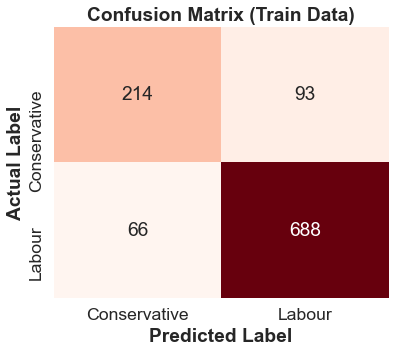

In [160]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

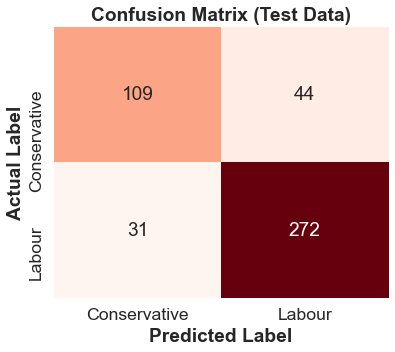

In [161]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [162]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.70      0.73       307
      Labour       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [163]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.78      0.71      0.74       153
      Labour       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



AUC: 0.910


C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


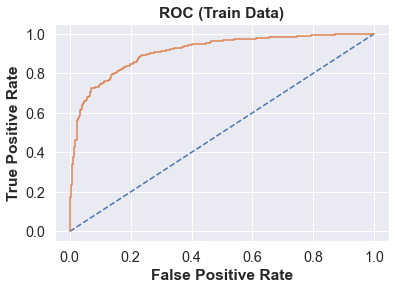

In [164]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.884


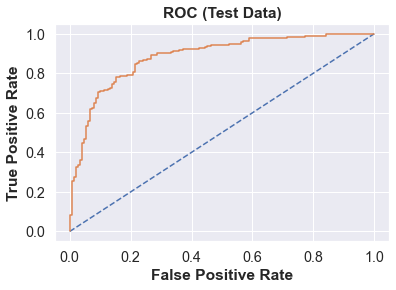

In [165]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [166]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df=df.rename(columns={'age':'AGE'})
df

,vote,AGE,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


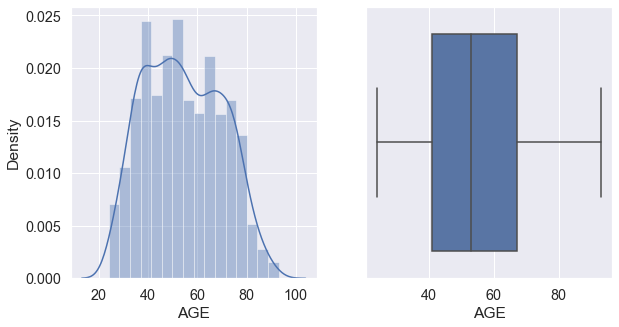

In [167]:
# Univariate analysis
# This is a continuous variable
# figure size
sns.set(font_scale=1.3)
plt.figure(figsize = (15,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['AGE'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['AGE'])
plt.show()
sns.set(font_scale=1.0)

In [168]:
df['AGE'].skew(), df['AGE'].kurt()

(0.13979987012068112, -0.943707667905203)

-0.09574897359579736 -0.9267602571694074


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


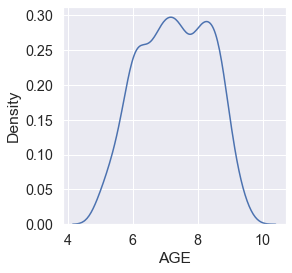

In [169]:
# Using sqrt
sns.set(font_scale=1.3)
print(np.sqrt(df['AGE']).skew(),np.sqrt(df['AGE']).kurt())
plt.figure(figsize = (4,4))
sns.distplot(np.sqrt(df['AGE']),hist=False)
sns.set(font_scale=1.0)
plt.show()

-0.29579648374836975 -0.7890172316601252


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


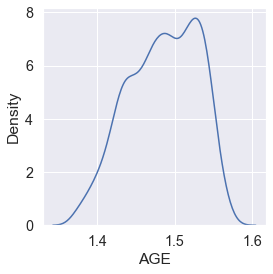

In [170]:
# Using root of 10
sns.set(font_scale=1.3)
print((df['AGE']**0.1).skew(),(df['AGE']**0.1).kurt())
plt.figure(figsize = (4,4))
sns.distplot(df['AGE']**0.1, hist=False)
plt.show()
sns.set(font_scale=1.0)

-0.34771205219748524 -0.7349404394365804


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


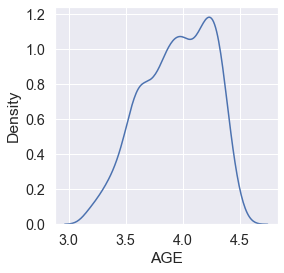

In [171]:
# Using log transformation
sns.set(font_scale=1.3)
print(np.log(df['AGE']).skew(),np.log(df['AGE']).kurt())
plt.figure(figsize = (4,4))
sns.distplot(np.log(df['AGE']), hist=False)
plt.show()
sns.set(font_scale=1.0)

In [172]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df['age']=np.sqrt(df['age'])
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,6.557439,3,3,4,1,2,2,0
1,Labour,6.000000,4,4,4,4,5,2,1
2,Labour,5.916080,4,4,5,2,3,2,1
3,Labour,4.898979,4,2,2,1,4,0,0
4,Labour,6.403124,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,8.185353,5,3,2,4,11,3,1
1513,Conservative,8.544004,2,2,4,4,8,2,1
1514,Labour,6.082763,3,3,5,4,2,2,1
1515,Conservative,7.810250,3,3,1,4,11,2,1


In [173]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [175]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [176]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 5810 epochs took 5 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8473138548539114

In [177]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8114035087719298

In [178]:
model.coef_

array([[ 0.0209863 ,  0.05090154,  0.02475174, -0.00046843,  0.04524289,
         0.04753032,  0.0365651 ,  0.01736925, -0.00809543,  0.00109595,
        -0.09050773,  0.10990887,  0.03244794, -0.03609412,  0.06690611,
        -0.04636001, -0.04551952,  0.03306253,  0.03380933, -0.0146695 ,
         0.01324734, -0.01202545, -0.00442537,  0.00725335, -0.1312183 ,
        -0.01231167, -0.01567224,  0.09497599,  0.11262857,  0.01370137,
        -0.00434515,  0.07897743,  0.0334583 , -0.02150944, -0.09423512,
        -0.03986927, -0.00299806,  0.02782832, -0.04360683, -0.04996006,
         0.0253182 , -0.02359459,  0.02614861,  0.01547691,  0.01700574,
         0.00613105,  0.02188655,  0.00415111, -0.01965241, -0.01449358,
         0.04768037, -0.017073  , -0.01164873, -0.04840904,  0.0346514 ,
         0.00897931,  0.00874325,  0.08915226,  0.10929955, -0.00304325,
        -0.00942554, -0.03965673,  0.01210791,  0.07124918, -0.01318484,
        -0.01022924, -0.06855711, -0.00558862,  0.0